In [1]:
import numpy as np
import sys

import run_utils

sys.path.append('../') 
import reclab

from reclab.recommenders import LibFM
from reclab import data_utils

/Users/karlk/repos/recsys-eval/experiments/run_utils.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook
/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as 

In [2]:
bucket_name = 'recsys-eval'
data_dir = 'Karl'

# ML 100k

loading and tuning


In [3]:
users, items, ratings = data_utils.read_dataset('ml-100k')

default_params = dict(num_two_way_factors=32, learning_rate=0.1,
              bias_reg=0., one_way_reg=0., two_way_reg=0., 
              num_iter=100, num_user_features=0, num_item_features=0, num_rating_features=0,
              max_num_users=len(users), max_num_items=len(items))

tuner = run_utils.ModelTuner((users, items, ratings), default_params, LibFM,
                             n_fold=5, verbose=True, bucket_name=bucket_name,
                             data_dir=data_dir, recommender_name='libfm')

In [5]:
regs = [0.01, 0.05]
sss = [0.1, 0.05]

res_df = tuner.evaluate_grid(reg=regs, learning_rate=sss)

Evaluating: {'reg': 0.01, 'learning_rate': 0.1}
Fold 1/5, mse=1.781320787348802
Fold 2/5, mse=1.7526733470434661
Fold 3/5, mse=1.9263488005498481
Fold 4/5, mse=1.8969625837311876
Fold 5/5, mse=2.172817256026065
Average MSE: 1.9060245549398735
Evaluating: {'reg': 0.01, 'learning_rate': 0.05}
Fold 1/5, mse=1.8801514813975095
Fold 2/5, mse=1.9866454337781219
Fold 3/5, mse=1.9943064967522819
Fold 4/5, mse=1.9325847120496096
Fold 5/5, mse=1.9310150340865098
Average MSE: 1.9449406316128066
Evaluating: {'reg': 0.05, 'learning_rate': 0.1}
Fold 1/5, mse=1.781320787348802
Fold 2/5, mse=1.7526733470434661
Fold 3/5, mse=1.9263488005498481
Fold 4/5, mse=1.8969625837311876
Fold 5/5, mse=2.172817256026065
Average MSE: 1.9060245549398735
Evaluating: {'reg': 0.05, 'learning_rate': 0.05}
Fold 1/5, mse=1.8801514813975095
Fold 2/5, mse=1.9866454337781219
Fold 3/5, mse=1.9943064967522819
Fold 4/5, mse=1.9325847120496096
Fold 5/5, mse=1.9310150340865098
Average MSE: 1.9449406316128066
Saving to S3.


TypeError: 'NoneType' object is not subscriptable

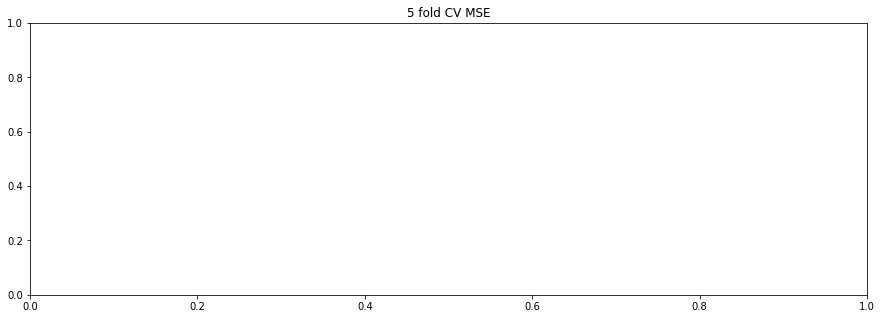

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,5])
plt.title("5 fold CV MSE")
plt.boxplot(res_dict['average_mses'], labels=res_dict.keys());
plt.xticks(rotation=90)

In [11]:
dims = [8, 16, 32, 56, 128, 256]
params_list = [('dim={}'.format(k), dict(bias_reg=0.1, one_way_reg=0.1, two_way_reg=0.1, 
                                         learning_rate=0.005, num_two_way_factors=k)) for k in dims]

res_dict = tuner.evaluate_list(params_list)

Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1, 'learning_rate': 0.005, 'num_two_way_factors': 8}
Fold 1/5, mse=0.8642756163705609
Fold 2/5, mse=0.8530917296032209
Fold 3/5, mse=0.8379744207027668
Fold 4/5, mse=0.8432846551603826
Fold 5/5, mse=0.8197650316707888
Average MSE: 0.843678290701544
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1, 'learning_rate': 0.005, 'num_two_way_factors': 16}
Fold 1/5, mse=0.8606387026644754
Fold 2/5, mse=0.850357727390412
Fold 3/5, mse=0.8387158031762189
Fold 4/5, mse=0.838599096338516
Fold 5/5, mse=0.8160730047719573
Average MSE: 0.8408768668683159
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1, 'learning_rate': 0.005, 'num_two_way_factors': 32}
Fold 1/5, mse=0.8591696322279365
Fold 2/5, mse=0.8471232670026164
Fold 3/5, mse=0.8375817944600631
Fold 4/5, mse=0.8404724286163197
Fold 5/5, mse=0.8105690942841294
Average MSE: 0.8389832433182131
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 

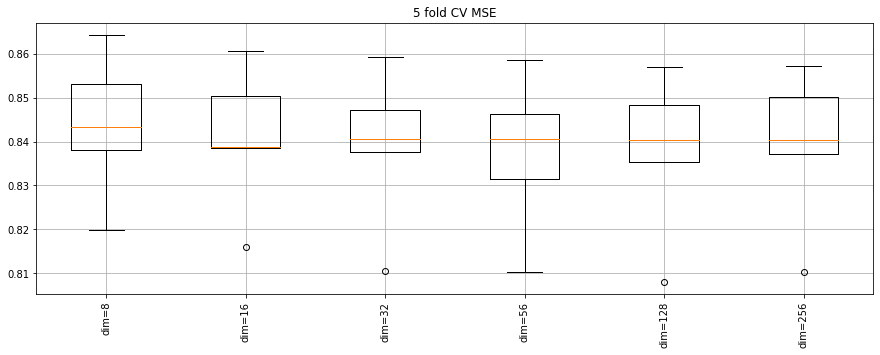

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,5])
plt.title("5 fold CV MSE")
plt.boxplot(res_dict.values(), labels=res_dict.keys());
plt.xticks(rotation=90) 
plt.grid()

# ML 10M

no need to tune model since previous work has determined best settings

In [17]:
datafile = '~/recsys/recsys-eval/data/ml-10M100K/ratings.dat'

In [6]:
users, items, ratings = data_utils.read_dataset('ml-10m')


In [10]:
len(items)

10677

# Citeulike-a

TODO: current setting can just predict 1 for ever item! We need more specialized implicit rating methods which are not included in libfm

In [6]:
users, items, ratings = data_utils.read_dataset('citeulike-a')

print(len(ratings))
print(len(np.unique(ratings)))


199435
1


In [7]:
len(ratings)/ (len(users) * len(items))

0.0021168843249956596

# Pinterest

TODO: current setting can just predict 1 for ever item! We need more specialized implicit rating methods which are not included in libfm

# LastFM

In [2]:
users, items, ratings = data_utils.read_dataset('lastfm', shuffle=True)

In [3]:
len(users)

992

In [4]:
len(items)

177023

In [5]:
len(ratings)

904625

In [11]:
import os
import pandas as pd
data_name = 'lastfm-dataset-1K/lfm1k-play-counts.csv'
csv_params = dict(header=0, usecols=[0, 1, 2],
                  names=['user_id', 'item_id', 'rating'])
datafile = os.path.join('../data/', data_name)
data = pd.read_csv(datafile, **csv_params)

In [16]:
data['rating'] = np.log(1+data['rating'])

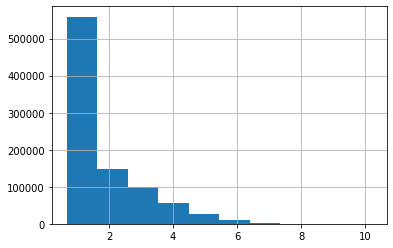

In [18]:
data['rating'].hist()

ValueError: autodetected range of [[], []] is not finite

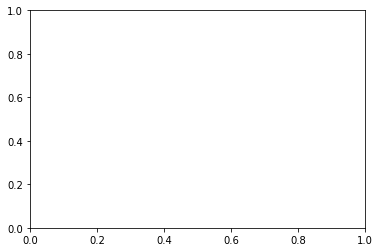

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(ratings.values())